# Dow Jones Industrial Average

# Промышленный индекс Доу — Джонса

### Данные

https://in.finance.yahoo.com/quote/%5EDJI/history?p=%5EDJI

### Описание

https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%BE%D0%BC%D1%8B%D1%88%D0%BB%D0%B5%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B8%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_%D0%94%D0%BE%D1%83_%E2%80%94_%D0%94%D0%B6%D0%BE%D0%BD%D1%81%D0%B0

In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, History
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
sample_df = pd.read_csv('./data/DJI_ds.tsv')

In [3]:
sample_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-29,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000
1,1985-01-30,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000
2,1985-01-31,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000
3,1985-02-01,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000
4,1985-02-04,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000


In [4]:
def denormalize(df,norm_data):
    values = df['Close'].values.reshape(-1,1)
    scl = MinMaxScaler()
    a = scl.fit_transform(values)
    new = scl.inverse_transform(pred)
    return new

In [5]:
sample_df = sample_df.drop(['Date'],axis=1) # Drop Date feature
sample_df = sample_df.dropna(inplace=False)  # Remove all nan entries.
sample_df = sample_df.drop(['Adj Close','Volume'],axis=1) # Drop Adj close and volume feature

In [6]:
sample_df.head()

,Open,High,Low,Close
0,1277.719971,1295.489990,1266.890015,1292.619995
1,1297.369995,1305.099976,1278.930054,1287.880005
2,1283.239990,1293.400024,1272.640015,1286.770020
3,1276.939941,1286.109985,1269.770020,1277.719971
4,1272.079956,1294.939941,1268.989990,1290.079956


In [7]:
df_train = sample_df[:5000]    
df_test = sample_df[5000:]

In [8]:
scaler = MinMaxScaler()

In [9]:
X_train = scaler.fit_transform(df_train.drop(['Close'],axis=1).as_matrix())
y_train = scaler.fit_transform(df_train['Close'].as_matrix().reshape(-1,1))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [10]:
X_test = scaler.fit_transform(df_test.drop(['Close'],axis=1).as_matrix())
y_test = scaler.fit_transform(df_test['Close'].as_matrix().reshape(-1,1))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


# Создать модель для решения задачи регрессии

In [11]:
def deep_model_v1():
    model = Sequential() 
    model.add(Dense(1, activation='linear', kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [12]:
history = History()
reg_model = deep_model_v1()
reg_model.fit(X_train, y_train, validation_data=(X_test,y_test), 
              batch_size=256, epochs=60, callbacks=[history], verbose=0)

# Визуализировать train - val loss

In [13]:
def plot_loss(train_loss, val_loss):
    plt.plot(train_loss, label='train_loss')
    plt.plot(val_loss, label='val_loss')
    plt.grid()
    plt.legend()
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

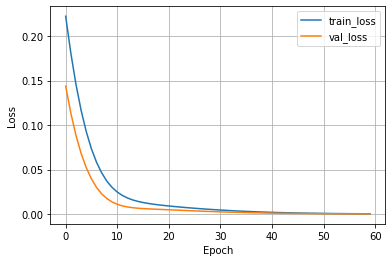

In [14]:
plot_loss(history.history['loss'], history.history['val_loss'])

# Получить предсказание на test и визуализировать его

Использовать функцию denormalize

In [15]:
y_pred = reg_model.predict(X_test)

In [16]:
X = []
for i in range(len(y_test)):
    X.append(i)

pred = []
test = []
for i in range(len(y_test)):
    test.append(y_test[i][0])
    pred.append(y_pred[i][0])    

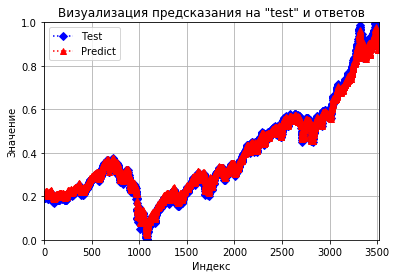

In [17]:
test_value, pred_value = plt.plot(X, test, 'bD:', X, pred, 'r^:')
# Задаем интервалы значений по осям X и Y
plt.axis([0, len(y_pred), 0, 1])

plt.title(u'Визуализация предсказания на "test" и ответов')
plt.xlabel(u'Индекс')
plt.ylabel(u'Значение')
# Задаем исходные данные для легенды и ее размещение
plt.legend( (test_value, pred_value), (u'Test', u'Predict'), loc = 'best')
# Включаем сетку
plt.grid()